# pyFiDEL 

This is simple tutorial to demonstrate the usage of pyFiDEL package

In [1]:
from pyFiDEL import SimClassifier, PCR, FiDEL

from pyFiDEL.ranks import get_fermi_min, get_fermi_root, build_correspond_table, get_lambda, build_metric

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

## Gaussian Score Classifier

we can create arbitrary binary classifier which has two Gaussian score distribution. 

In [2]:
# create simulator

c = SimClassifier(N = 10000, rho = 0.5)

# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0 = .9, tol=1E-4)

Final AUC: 0.8999249599999999 (iter: 5) mu2: 1.8123876048736465


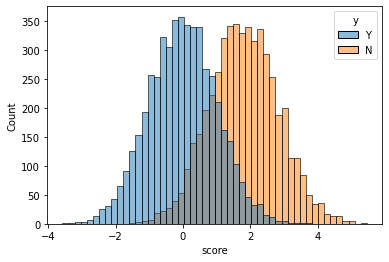

In [3]:
# show score histogram

c.plot_score()

plt.savefig('score_dist.pdf', dpi=300)

In [5]:
# calculate metric and build curve information 

df, info = build_metric(c.score, c.y)
df

,score,y,rank,tpr,fpr,bac,prec
0,-3.579816,Y,1,0.0002,0.0000,0.5001,1.00000
1,-3.310260,Y,2,0.0004,0.0000,0.5002,1.00000
2,-3.169906,Y,3,0.0006,0.0000,0.5003,1.00000
3,-3.110940,Y,4,0.0008,0.0000,0.5004,1.00000
4,-3.093857,Y,5,0.0010,0.0000,0.5005,1.00000
...,...,...,...,...,...,...,...
9995,5.071034,N,9996,1.0000,0.9992,0.5004,0.50020
9996,5.073135,N,9997,1.0000,0.9994,0.5003,0.50015
9997,5.091390,N,9998,1.0000,0.9996,0.5002,0.50010
9998,5.312612,N,9999,1.0000,0.9998,0.5001,0.50005


In [6]:
info

{'auc_rank': 0.8999249599999999,
 'auc_bac': 0.8999249600000003,
 'auprc': 0.9008748725059668,
 'rho': 0.5,
 'beta': 7.556712876069226,
 'mu': 0.5,
 'r_star': 0.5}

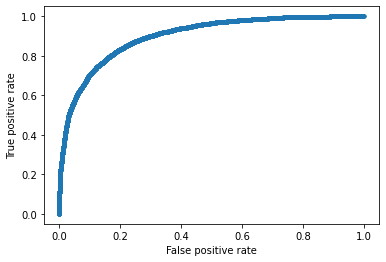

In [7]:
# Plot ROC curve

plt.plot(df['fpr'], df['tpr'], '.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.savefig('roc_curve.pdf', dpi=300)

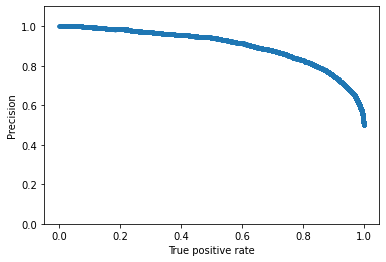

In [8]:
# plot precision-recall curve

plt.plot(df['tpr'], df['prec'], '.')
plt.xlabel('True positive rate')
plt.ylabel('Precision')
plt.ylim(0, 1.1)

plt.savefig('prec_curve.pdf', dpi=300)

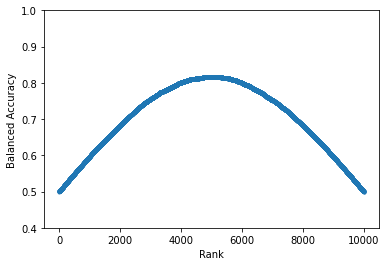

In [9]:
# plot balanced accuracy curve

plt.plot(df['rank'], df['bac'], '.')
plt.xlabel('Rank')
plt.ylabel('Balanced Accuracy')
plt.ylim(.4, 1)

plt.savefig('bac_curve.pdf', dpi=300)

# Fermi-Dirac distribution

From AUC and rho, we can find the corresponding beta, mu so that we can represent probability at given rank as a Fermi-Dirac distribution

In [10]:
# minimum optimization method

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_min(auc, 0.5, resol=1E-5), ignore_index=True)
    
ans

,beta,mu,r_star
0,1.220736,0.499996,0.499996
1,2.595059,0.499997,0.499997
2,4.394915,0.499997,0.499997
3,7.560261,0.500003,0.500003


In [11]:
# root-find optimization method

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_fermi_root(auc, 0.5), ignore_index=True)
    
ans

,beta,mu,r_star
0,1.222231,0.5,0.5
1,2.595283,0.5,0.5
2,4.394618,0.5,0.5
3,7.560362,0.5,0.5


In [12]:
# find lambda1 and lambda2 using approximation formula

auclist = [0.6, 0.7, 0.8, 0.9]
ans = pd.DataFrame()

for auc in auclist:
    ans = ans.append(get_lambda(auc, 0.5), ignore_index=True)
   
# check with beta, mu
ans['beta'] = ans['l2'] * 1000
ans['mu'] = - ans['l1'] / (1000 * ans['l2'])
ans

,l1low,l2low,l1high,l2high,l1,l2,r_star,beta,mu
0,-0.540601,0.0012,-1.290994,0.002582,-0.690679,0.001476,467.813541,1.476399,0.467814
1,-0.961201,0.0024,-1.490712,0.002981,-1.173005,0.002633,445.574064,2.632571,0.445574
2,-1.261801,0.0036,-1.825742,0.003651,-1.600166,0.003631,440.708720,3.630892,0.440709
3,-1.442401,0.0048,-2.581989,0.005164,-2.354071,0.005091,462.381988,5.091183,0.462382


In [13]:
# create correpondence table

auclist = np.linspace(0.52, 0.98, num=47)
rholist = np.linspace(0.1, 0.9, num=17)

df = build_correspond_table(auclist, rholist, resol=1E-5, method='root')
df

,auc,rho,beta,mu,r_star
0,0.52,0.10,0.240210,-8.655104,0.491996
1,0.52,0.15,0.240201,-6.728451,0.492997
2,0.52,0.20,0.240194,-5.277569,0.493997
3,0.52,0.25,0.240187,-4.078982,0.494998
4,0.52,0.30,0.240182,-3.031731,0.495998
...,...,...,...,...,...
794,0.98,0.70,19.676180,0.700139,0.657077
795,0.98,0.75,20.720782,0.750272,0.697252
796,0.98,0.80,22.225303,0.800531,0.738157
797,0.98,0.85,24.449517,0.851058,0.780112


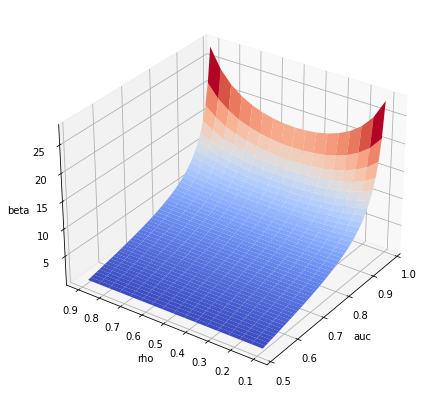

In [35]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

X = df['auc'].values.reshape((len(auclist), len(rholist)))
Y = df['rho'].values.reshape((len(auclist), len(rholist)))
Z = df['beta'].values.reshape((len(auclist), len(rholist)))
                              
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap=cm.coolwarm)
ax.set_xlabel('auc')
ax.set_ylabel('rho')
ax.set_zlabel('beta')
ax.view_init(30, 215)

plt.savefig('beta_surface.pdf', dpi=300)

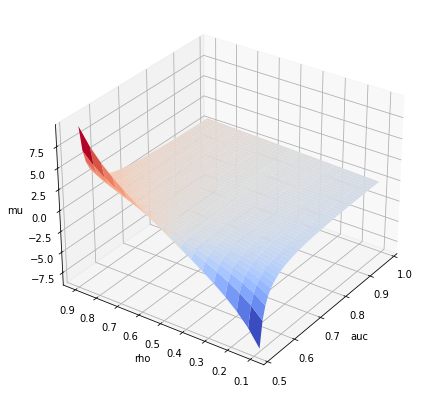

In [36]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(7, 7))

Z = df['mu'].values.reshape((len(auclist), len(rholist)))
                              
surf = ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap=cm.coolwarm)
ax.set_xlabel('auc')
ax.set_ylabel('rho')
ax.set_zlabel('mu')
ax.view_init(30, 215)

plt.savefig('mu_surface.pdf', dpi=300)

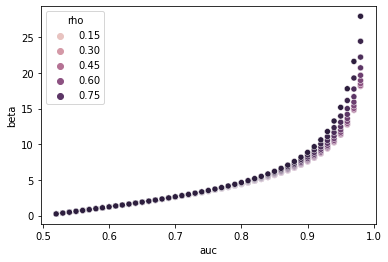

In [37]:
sns.scatterplot(data=df, x='auc', y='beta', hue='rho')
plt.savefig('auc-beta.pdf', dpi=300)

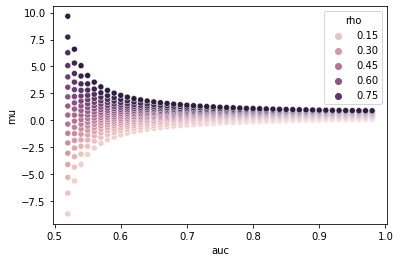

In [38]:
sns.scatterplot(data=df, x='auc', y='mu', hue='rho')
plt.savefig('auc-mu.pdf', dpi=300)

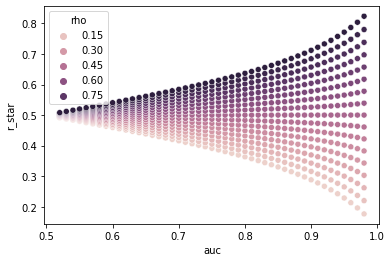

In [39]:
sns.scatterplot(data=df, x='auc', y='r_star', hue='rho')
plt.savefig('auc-r_star.pdf', dpi=300)

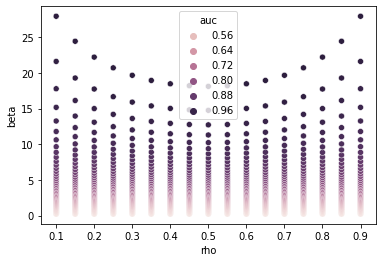

In [40]:
sns.scatterplot(data=df, x='rho', y='beta', hue='auc')
plt.savefig('rho-beta.pdf', dpi=300)

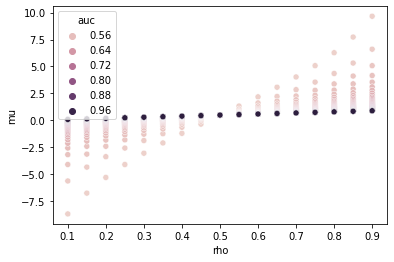

In [41]:
sns.scatterplot(data=df, x='rho', y='mu', hue='auc')
plt.savefig('rho-mu.pdf', dpi=300)

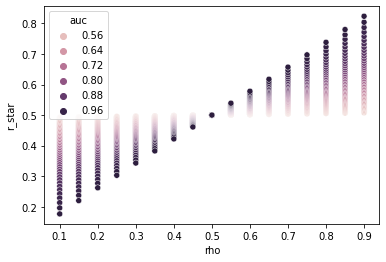

In [42]:
sns.scatterplot(data=df, x='rho', y='r_star', hue='auc')
plt.savefig('rho-r_star.pdf', dpi=300)

## Probability of class at given rank

In [2]:
# create simulator

c = SimClassifier(N = 10000, rho = 0.6)

# generate Gaussian score with target AUC

score = c.create_gaussian_scores(auc0 = .85)

Final AUC: 0.8500774583333333 (iter: 23) mu2: 1.4657381559184341


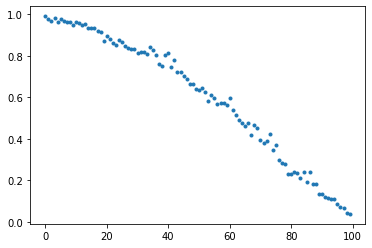

In [3]:
p = PCR(c.score, c.y, sample_size=100, sample_n=500)
plt.plot(p.pcr, '.')

In [4]:
# calculate from pcr

df, info = p.build_metric()
info

... build metric parameters (N = 100)
... Pxy integral calculation with resolution = 1e-06
... Pxxy integral calculation with resolution = 1e-06
... Pxyy integral calculation with resolution = 1e-06


{'auc_rank': 0.8503575,
 'auc_bac': 0.8503575000000001,
 'auprc': 0.8705254744343088,
 'rho': 0.6,
 'beta': 5.710791746344454,
 'mu': 0.6130226933909532,
 'r_star': 0.5420228870387591,
 'var_auc': 0.0015102115828005633,
 'Pxy': 0.8503574165787247,
 'Pxxy': 0.7563697518883754,
 'Pxyy': 0.7624615609703154,
 'auc0': 0.8503575,
 'auc sigma': 0.038861440822498636,
 '95% ci': [0.7741890759879027, 0.9265259240120973]}

In [5]:
# compare with original score

df0, info0 = build_metric(c.score, c.y)
info0

{'auc_rank': 0.8500774583333333,
 'auc_bac': 0.8500774583333335,
 'auprc': 0.8888780943378746,
 'rho': 0.6,
 'beta': 5.702255092063696,
 'mu': 0.6130799658432616,
 'r_star': 0.5419738680693329}

In [49]:
df

,rank,prob,tpr,fpr,bac,prec
0,1.0,0.994,0.016567,0.00015,0.508208,0.994000
1,2.0,0.976,0.032833,0.00075,0.516042,0.985000
2,3.0,0.964,0.048900,0.00165,0.523625,0.978000
3,4.0,0.964,0.064967,0.00255,0.531208,0.974500
4,5.0,0.962,0.081000,0.00350,0.538750,0.972000
...,...,...,...,...,...,...
95,96.0,0.094,0.997033,0.90445,0.546292,0.623146
96,97.0,0.050,0.997867,0.92820,0.534833,0.617237
97,98.0,0.052,0.998733,0.95190,0.523417,0.611469
98,99.0,0.032,0.999267,0.97610,0.511583,0.605616


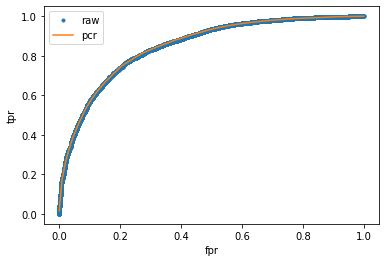

In [57]:
# compare ROC curve

plt.plot(df0['fpr'], df0['tpr'], '.', label='raw')
plt.plot(df['fpr'], df['tpr'], '-', label='pcr')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend()
plt.show()

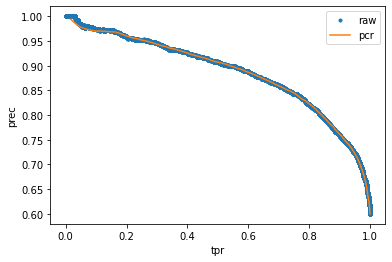

In [58]:
# compare precision-recall curve

plt.plot(df0['tpr'], df0['prec'], '.', label='raw')
plt.plot(df['tpr'], df['prec'], '-', label='pcr')
plt.xlabel('tpr')
plt.ylabel('prec')
plt.legend()
plt.show()

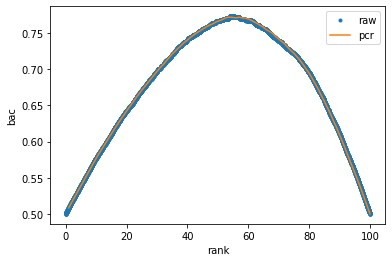

In [60]:
# compare balanced accuracy curve

plt.plot(df0['rank']/100., df0['bac'], '.', label='raw')
plt.plot(df['rank'], df['bac'], '-', label='pcr')
plt.xlabel('rank')
plt.ylabel('bac')
plt.legend()
plt.show()

In [61]:
p.check_fermi()

{'MAE': 0.027691631312661048,
 'RMSE': 0.036719953556230804,
 'SSEV': 100.41772089589337}

In [62]:
p.df

,rank,prob,tpr,fpr,bac,prec,fy,err
0,1.0,0.994,0.016567,0.00015,0.508208,0.994000,0.969102,0.024898
1,2.0,0.976,0.032833,0.00075,0.516042,0.985000,0.967344,0.008656
2,3.0,0.964,0.048900,0.00165,0.523625,0.978000,0.965490,-0.001490
3,4.0,0.964,0.064967,0.00255,0.531208,0.974500,0.963535,0.000465
4,5.0,0.962,0.081000,0.00350,0.538750,0.972000,0.961473,0.000527
...,...,...,...,...,...,...,...,...
95,96.0,0.094,0.997033,0.90445,0.546292,0.623146,0.121017,-0.027017
96,97.0,0.050,0.997867,0.92820,0.534833,0.617237,0.115069,-0.065069
97,98.0,0.052,0.998733,0.95190,0.523417,0.611469,0.109377,-0.057377
98,99.0,0.032,0.999267,0.97610,0.511583,0.605616,0.103933,-0.071933


In [63]:
p.df[['prob', 'fy']].corr(method='pearson')

,prob,fy
prob,1.000000,0.992471
fy,0.992471,1.000000


In [64]:
p.df[['prob', 'fy']].corr(method='kendall')

,prob,fy
prob,1.000000,0.962469
fy,0.962469,1.000000


In [65]:
p.df[['prob', 'fy']].corr(method='spearman')

,prob,fy
prob,1.000000,0.997276
fy,0.997276,1.000000


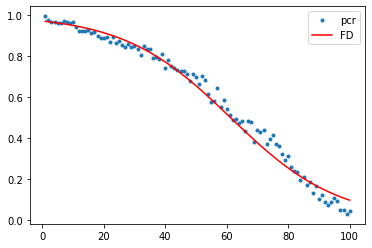

In [67]:
plt.plot(p.df['rank'], p.df['prob'], '.', label='pcr')
plt.plot(p.df['rank'], p.df['fy'], 'r', label='FD')
plt.legend()
plt.show()

## FiDEL - ensemble method

In [2]:
from pyFiDEL import SimClassifier, PCR, FiDEL
import numpy as np

# prepare classifier results

n_samples = 1000
c = SimClassifier(N = n_samples, rho = 0.7)
#auc_list = [0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66]
auc_list = np.linspace(0.55, 0.65, num=30)

# create predictions
prediction = c.create_predictions(n_methods=20, auc_list=auc_list)

Final AUC: 0.55 (iter: 245) mu2: 0.17771198098851557
Final AUC: 0.5535380952380953 (iter: 777) mu2: 0.19003959969622755
Final AUC: 0.556947619047619 (iter: 79) mu2: 0.20238167579184274
Final AUC: 0.5603619047619048 (iter: 10) mu2: 0.21473918553967924
Final AUC: 0.5637380952380953 (iter: 25) mu2: 0.22711311358872338
Final AUC: 0.5672619047619049 (iter: 209) mu2: 0.23950445355000635
Final AUC: 0.5706047619047618 (iter: 53) mu2: 0.25191420858690544
Final AUC: 0.5740952380952381 (iter: 205) mu2: 0.26434339201931784
Final AUC: 0.5775428571428571 (iter: 187) mu2: 0.27679302794270044
Final AUC: 0.5809809523809524 (iter: 13) mu2: 0.2892641518629992
Final AUC: 0.5845047619047619 (iter: 46) mu2: 0.30175781134855517
Final AUC: 0.5879285714285714 (iter: 127) mu2: 0.3142750667001051
Final AUC: 0.5913714285714287 (iter: 259) mu2: 0.3268169916400592
Final AUC: 0.5949 (iter: 159) mu2: 0.3393846740222918
Final AUC: 0.5983666666666667 (iter: 345) mu2: 0.35197921656374204
Final AUC: 0.601804761904762 (it

In [3]:
f = FiDEL(prediction)

In [4]:
f.calculate_performance(y=c.y, alpha=1.)

... sample #: 1000, method #: 30
... estimated auc (ensemble): 0.7945047619047618


In [5]:
f.calculate_performance(y=c.y, alpha=1., method='WoC')

... sample #: 1000, method #: 30
... estimated auc (ensemble): 0.7862428571428571


/Users/skim/CoreData/Local_Keep/git_repos/pyFiDEL/pyFiDEL/ensemble.py:59: RuntimeWarning: overflow encountered in exp
  self.estimated_prob = 1. / (1. + np.exp(-self.estimated_logit))


In [6]:
f.df

,Name,AUC,beta,mu,r_star
0,M0,0.550000,1,1915.481378,510.030157
1,M1,0.553538,1,1822.394473,510.744670
2,M2,0.556948,1,1743.662391,511.434149
3,M3,0.560362,1,1673.759555,512.125568
4,M4,0.563738,1,1612.025370,512.810294
5,M5,0.567262,1,1554.226550,513.526108
6,M6,0.570605,1,1504.750699,514.206310
7,M7,0.574095,1,1457.876580,514.917806
8,M8,0.577543,1,1415.741922,515.621891
9,M9,0.580981,1,1377.316785,516.325411


In [5]:
f.estimated_prob

array([3.45189166e-04, 3.84715691e-06, 1.45709883e-02, 7.84055612e-04,
       3.33096463e-05, 6.30830405e-03, 8.53833046e-02, 3.69182401e-04,
       3.25259194e-05, 6.85758042e-05, 1.20396363e-03, 5.95984342e-05,
       1.67443424e-03, 2.47714613e-02, 7.26060666e-05, 1.83611157e-06,
       3.06813311e-06, 2.92879109e-04, 5.65472516e-05, 3.40585438e-05,
       1.84572462e-05, 6.98210035e-03, 8.40837441e-06, 9.68241093e-08,
       7.24854892e-07, 1.47289720e-06, 2.05147328e-03, 2.01034768e-02,
       1.28481798e-03, 1.88651881e-05, 2.91838088e-04, 1.81135803e-04,
       1.54584164e-02, 1.92121323e-03, 6.65805556e-06, 7.50322275e-06,
       5.39032348e-02, 4.65871120e-06, 4.28317224e-02, 1.05035438e-04,
       5.14874622e-04, 9.53691676e-01, 5.06186769e-05, 1.28677557e-04,
       5.62952121e-02, 8.61560209e-02, 1.13319144e-02, 3.50502877e-01,
       9.99183594e-02, 9.75679860e-03, 8.61606789e-03, 3.80981076e-02,
       5.68199395e-06, 3.10468361e-07, 1.90232604e-01, 3.38279332e-01,
      

# Confidence Interval

In [1]:
from pyFiDEL.ci import Pxy_int, Pxxy_int, Pxyy_int, var_auc_fermi
from pyFiDEL.ranks import get_fermi_root

In [2]:
auc = .9
rho = .5

bm = get_fermi_root(auc, rho)

In [3]:
bm

{'beta': 7.560362383181233, 'mu': 0.5, 'r_star': 0.5}

In [4]:
Pxy_int(bm['beta'], bm['mu'], rho)

... Pxy integral calculation with resolution = 1e-06


0.8999999026468701

In [5]:
Pxxy_int(bm['beta'], bm['mu'], rho)

... Pxxy integral calculation with resolution = 1e-06


0.8332453944182329

In [6]:
Pxyy_int(bm['beta'], bm['mu'], rho)

... Pxyy integral calculation with resolution = 1e-06


0.8332453944182246

In [7]:
var_auc_fermi(auc, rho, N=1000)

... Pxy integral calculation with resolution = 1e-06
... Pxxy integral calculation with resolution = 1e-06
... Pxyy integral calculation with resolution = 1e-06


{'var_auc': 9.315631436971133e-05,
 'Pxy': 0.8999999026468701,
 'Pxxy': 0.8332453944182329,
 'Pxyy': 0.8332453944182246,
 'beta': 7.560362383181233,
 'mu': 0.5,
 'auc0': 0.9,
 'auc sigma': 0.009651751880861387,
 '95% ci': [0.8810825663135117, 0.9189174336864884]}